# Battle of the Binge: OTT Data Analysis

## Review 1: Data Processing and Exploratory Data Analysis (EDA)

This notebook covers the **first phase** of the project, focusing on:

1. **Identifying and sourcing relevant datasets**
2. **Cleaning and handling missing values**
3. **Feature selection and engineering**
4. **Ensuring data integrity and consistency**
5. **Generating summary statistics and initial insights**
6. **Identifying patterns, trends, and anomalies**
7. **Handling outliers and considering data transformations**
8. **Creating initial visual representations of key findings**


## 0. Setup and Library Imports

In [1]:
# Import necessary Python libraries for data manipulation, numerical operations, and visualization.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re # For regular expressions, useful in cleaning

# Configure pandas for better display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', 1000)

# Configure Seaborn for plots
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

---

## 1. Identifying and Sourcing Relevant Datasets (4 Marks)

In this step, we load the datasets for **Netflix**, **Amazon Prime Video**, and **Disney+** from their respective CSV files.  
We'll also add a `platform` column to each DataFrame to easily identify the source of each record after merging.

---


In [2]:
# Define file paths
netflix_path = '../01_Data/raw_data/netflix_data.csv'
amazon_path = '../01_Data/raw_data/amazon_prime_data.csv'
disney_path = '../01_Data/raw_data/disney_plus_data.csv'

# Load datasets
try:
    df_netflix = pd.read_csv(netflix_path)
    df_amazon = pd.read_csv(amazon_path)
    df_disney = pd.read_csv(disney_path)
except FileNotFoundError as e:
    print(f"Error loading data files: {e}")
    print("Please ensure the CSV files are in the '../01_Data/raw_data/' directory relative to this notebook.")
    # Exit or raise error if files not found, as further steps depend on this.
    # For this example, we'll proceed assuming files might be loaded later or paths corrected.
    df_netflix = pd.DataFrame()
    df_amazon = pd.DataFrame()
    df_disney = pd.DataFrame()

# Add 'platform' column
if not df_netflix.empty:
    df_netflix['platform'] = 'Netflix'
if not df_amazon.empty:
    df_amazon['platform'] = 'Amazon Prime' # Standardizing name
if not df_disney.empty:
    df_disney['platform'] = 'Disney+'

# Display initial info for Netflix
print("--- Netflix Dataset ---")
if not df_netflix.empty:
    print("Head:")
    print(df_netflix.head(3))
    print("\nInfo:")
    df_netflix.info()
else:
    print("Netflix DataFrame is empty. Please check file path and loading.")

print("\n\n--- Amazon Prime Video Dataset ---")
if not df_amazon.empty:
    print("Head:")
    print(df_amazon.head(3))
    print("\nInfo:")
    df_amazon.info()
else:
    print("Amazon Prime DataFrame is empty. Please check file path and loading.")


print("\n\n--- Disney+ Dataset ---")
if not df_disney.empty:
    print("Head:")
    print(df_disney.head(3))
    print("\nInfo:")
    df_disney.info()
else:
    print("Disney+ DataFrame is empty. Please check file path and loading.")

--- Netflix Dataset ---
Head:
  show_id     type                 title         director                                                                                                                                                                                                                                                                                                             cast        country          date_added  release_year rating   duration                                                      listed_in                                                                                                                                               description platform
0      s1    Movie  Dick Johnson Is Dead  Kirsten Johnson                                                                                                                                                                                                                                                                 

---

## 2. Cleaning and Handling Missing Values (4 Marks)

We'll inspect each dataset for missing values and apply appropriate strategies to handle them.  
Common strategies include:

- **Imputation**: Filling with a specific value (e.g., mean, median, mode, or a placeholder like `"Unknown"`).
- **Dropping**: Removing rows or columns if missing data is extensive and not imputable.

---


In [3]:
# Function to report missing values
def report_missing_values(df, df_name):
    print(f"\n--- Missing Values Report for {df_name} ---")
    if df.empty:
        print(f"{df_name} DataFrame is empty.")
        return df

    missing_counts = df.isnull().sum()
    missing_percentages = (missing_counts / len(df)) * 100
    missing_df = pd.DataFrame({
        'Missing Count': missing_counts,
        'Missing Percentage': missing_percentages
    })
    print(missing_df[missing_df['Missing Count'] > 0].sort_values(by='Missing Count', ascending=False))
    return df

# --- Netflix: Missing Value Handling ---
if not df_netflix.empty:
    df_netflix = report_missing_values(df_netflix, "Netflix (Before Cleaning)")
    # Strategy:
    # director, cast, country: Impute with "Unknown" as these are categorical and "Unknown" is a valid placeholder.
    # date_added: Impute with mode or "Unknown". Let's check mode. If too sparse, "Unknown".
    # rating: Impute with mode, as it's a key categorical feature.
    # Imdb_score (if present, not in these specific Kaggle sets typically): Mean/Median.

    df_netflix['director'] = df_netflix['director'].fillna('Unknown')
    df_netflix['cast'] = df_netflix['cast'].fillna('Unknown')
    df_netflix['country'] = df_netflix['country'].fillna('Unknown')
    
    # For date_added and rating, using mode. If mode is NaN (empty series), use "Unknown".
    date_added_mode_netflix = df_netflix['date_added'].mode()
    df_netflix['date_added'] = df_netflix['date_added'].fillna(date_added_mode_netflix[0] if not date_added_mode_netflix.empty else "Unknown")
    
    rating_mode_netflix = df_netflix['rating'].mode()
    df_netflix['rating'] = df_netflix['rating'].fillna(rating_mode_netflix[0] if not rating_mode_netflix.empty else "Unknown")

    df_netflix = report_missing_values(df_netflix, "Netflix (After Cleaning)")


# --- Amazon Prime: Missing Value Handling ---
if not df_amazon.empty:
    df_amazon = report_missing_values(df_amazon, "Amazon Prime (Before Cleaning)")
    # Similar strategy as Netflix
    df_amazon['director'] = df_amazon['director'].fillna('Unknown')
    df_amazon['cast'] = df_amazon['cast'].fillna('Unknown')
    df_amazon['country'] = df_amazon['country'].fillna('Unknown')
    
    date_added_mode_amazon = df_amazon['date_added'].mode()
    df_amazon['date_added'] = df_amazon['date_added'].fillna(date_added_mode_amazon[0] if not date_added_mode_amazon.empty else "Unknown")
    
    rating_mode_amazon = df_amazon['rating'].mode()
    df_amazon['rating'] = df_amazon['rating'].fillna(rating_mode_amazon[0] if not rating_mode_amazon.empty else "Unknown")
    
    df_amazon = report_missing_values(df_amazon, "Amazon Prime (After Cleaning)")

# --- Disney+: Missing Value Handling ---
if not df_disney.empty:
    df_disney = report_missing_values(df_disney, "Disney+ (Before Cleaning)")
    # Similar strategy
    df_disney['director'] = df_disney['director'].fillna('Unknown')
    df_disney['cast'] = df_disney['cast'].fillna('Unknown')
    df_disney['country'] = df_disney['country'].fillna('Unknown')

    date_added_mode_disney = df_disney['date_added'].mode()
    df_disney['date_added'] = df_disney['date_added'].fillna(date_added_mode_disney[0] if not date_added_mode_disney.empty else "Unknown")

    rating_mode_disney = df_disney['rating'].mode()
    df_disney['rating'] = df_disney['rating'].fillna(rating_mode_disney[0] if not rating_mode_disney.empty else "Unknown")
    
    df_disney = report_missing_values(df_disney, "Disney+ (After Cleaning)")


--- Missing Values Report for Netflix (Before Cleaning) ---
            Missing Count  Missing Percentage
director             2634           29.908028
country               831            9.435676
cast                  825            9.367549
date_added             10            0.113546
rating                  4            0.045418
duration                3            0.034064

--- Missing Values Report for Netflix (After Cleaning) ---
          Missing Count  Missing Percentage
duration              3            0.034064

--- Missing Values Report for Amazon Prime (Before Cleaning) ---
            Missing Count  Missing Percentage
date_added           9513           98.396773
country              8996           93.049235
director             2083           21.545304
cast                 1233           12.753413
rating                337            3.485726

--- Missing Values Report for Amazon Prime (After Cleaning) ---
Empty DataFrame
Columns: [Missing Count, Missing Percentage]
I

---

## 3. Feature Selection and Engineering (4 Marks)

We will select relevant features, create new ones that might be useful for analysis, and prepare the data for merging.

### 🔧 Feature Engineering Steps:

1. **Standardize `duration`**  
   Extract the numerical duration and its unit (e.g., minutes for movies, seasons for TV shows).

2. **Process `date_added`**  
   Convert to datetime objects and extract the year and month of addition.

3. **Process `listed_in` (genres)**  
   Extract the **primary genre** from the genre list.

4. **Merge Datasets**  
   Combine the three cleaned DataFrames from Netflix, Prime Video, and Disney+.

5. **Feature Selection**  
   Drop columns not needed for analysis (e.g., `show_id`).

6. **Create `content_age_at_addition`**  
   Calculate the age of the content when it was added to the platform (i.e., `date_added` year - `release_year`).

---


In [5]:
# --- Feature Engineering for each DataFrame before merging ---
def engineer_features(df, df_name):
    print(f"\n--- Feature Engineering for {df_name} ---")
    if df.empty:
        print(f"{df_name} DataFrame is empty.")
        return df

    # 1. Standardize `duration`
    # Assuming 'Movie' durations are in 'min' and 'TV Show' in 'Season(s)'
    # This regex tries to extract the first number found.
    df['duration_numeric'] = df['duration'].astype(str).str.extract('(\d+)').astype(float) # Use float for now, then int
    df['duration_unit'] = df['duration'].astype(str).str.extract('([a-zA-Z]+)')
    
    # For TV Shows, 'Season' or 'Seasons' should be 'Season(s)' or similar
    # For Movies, unit is 'min'
    # A more robust way would be to check df['type']
    df.loc[df['type'] == 'Movie', 'duration_unit'] = 'min'
    df.loc[df['type'] == 'TV Show', 'duration_unit'] = 'Season(s)'
    
    # Handle cases where extraction might fail or be incorrect
    # For example, if duration is just a number without unit for some reason
    # For now, we rely on the common format.

    # 2. Process `date_added`
    # Strip leading/trailing whitespace first
    df['date_added'] = df['date_added'].astype(str).str.strip()
    # Convert to datetime, coercing errors will turn unparseable dates into NaT
    df['date_added_dt'] = pd.to_datetime(df['date_added'], errors='coerce')
    
    # Extract year and month. Handle NaT if any (e.g. from "Unknown" fill)
    df['year_added'] = df['date_added_dt'].dt.year.astype('Int64') # Use nullable integer
    df['month_added'] = df['date_added_dt'].dt.month.astype('Int64')

    # 3. Process `listed_in` (genres) - Extract primary genre
    df['primary_genre'] = df['listed_in'].astype(str).apply(lambda x: x.split(',')[0].strip())
    
    print(f"Engineered features for {df_name} (sample):")
    print(df[['type', 'duration', 'duration_numeric', 'duration_unit', 'date_added', 'date_added_dt', 'year_added', 'month_added', 'listed_in', 'primary_genre']].head())
    return df

if not df_netflix.empty:
    df_netflix = engineer_features(df_netflix, "Netflix")
if not df_amazon.empty:
    df_amazon = engineer_features(df_amazon, "Amazon Prime")
if not df_disney.empty:
    df_disney = engineer_features(df_disney, "Disney+")


--- Feature Engineering for Netflix ---
Engineered features for Netflix (sample):
      type   duration  duration_numeric duration_unit          date_added date_added_dt  year_added  month_added                                                      listed_in           primary_genre
0    Movie     90 min              90.0           min  September 25, 2021    2021-09-25        2021            9                                                  Documentaries           Documentaries
1  TV Show  2 Seasons               2.0     Season(s)  September 24, 2021    2021-09-24        2021            9                International TV Shows, TV Dramas, TV Mysteries  International TV Shows
2  TV Show   1 Season               1.0     Season(s)  September 24, 2021    2021-09-24        2021            9  Crime TV Shows, International TV Shows, TV Action & Adventure          Crime TV Shows
3  TV Show   1 Season               1.0     Season(s)  September 24, 2021    2021-09-24        2021            9     

In [6]:
# --- 4. Merge Datasets ---
# Concatenate the DataFrames. Ensure columns are consistent or handle discrepancies.
# Common columns are expected: show_id, type, title, director, cast, country, date_added, release_year, rating, duration, listed_in, description, platform,
# duration_numeric, duration_unit, date_added_dt, year_added, month_added, primary_genre

# Check for empty dataframes before attempting to concatenate
dataframes_to_concat = []
if not df_netflix.empty:
    dataframes_to_concat.append(df_netflix)
if not df_amazon.empty:
    dataframes_to_concat.append(df_amazon)
if not df_disney.empty:
    dataframes_to_concat.append(df_disney)

if dataframes_to_concat:
    df_all = pd.concat(dataframes_to_concat, ignore_index=True)
    print("\n\n--- Merged Dataset ---")
    print("Shape of merged dataset:", df_all.shape)
    print("Merged dataset head:")
    print(df_all.head())
    print("\nMerged dataset info:")
    df_all.info()
else:
    print("\nNo dataframes to merge. All individual dataframes are empty.")
    df_all = pd.DataFrame() # Create an empty df_all to avoid errors lat



--- Merged Dataset ---
Shape of merged dataset: (19925, 19)
Merged dataset head:
  show_id     type                  title         director                                                                                                                                                                                                                                                                                                             cast        country          date_added  release_year rating   duration                                                      listed_in                                                                                                                                               description platform  duration_numeric duration_unit date_added_dt  year_added  month_added           primary_genre
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson                                                                                                           

In [7]:
# --- 5. Feature Selection (on merged df_all) ---
if not df_all.empty:
    # `show_id` is an identifier, not typically used directly in aggregate analysis.
    # `description` can be used for NLP but not for this stage of EDA.
    # `date_added` (original string) and `date_added_dt` (datetime object) - keep dt for now.
    # `duration` (original string) - we have numeric and unit.
    # `listed_in` (original string) - we have primary_genre.
    
    columns_to_drop = ['show_id', 'description'] 
    # Also consider dropping original date_added, duration, listed_in if derived versions are robust
    # For now, let's keep them for reference and drop later if needed.
    
    df_all = df_all.drop(columns=[col for col in columns_to_drop if col in df_all.columns])
    print("\n--- After Feature Selection (dropping show_id, description) ---")
    print("Shape of dataset:", df_all.shape)
    print(df_all.head(2))


--- After Feature Selection (dropping show_id, description) ---
Shape of dataset: (19925, 17)
      type                 title         director                                                                                                                                                                                                                                                                                                             cast        country          date_added  release_year rating   duration                                        listed_in platform  duration_numeric duration_unit date_added_dt  year_added  month_added           primary_genre
0    Movie  Dick Johnson Is Dead  Kirsten Johnson                                                                                                                                                                                                                                                                                         

In [8]:
# --- 6. Create `content_age_at_addition` ---
if not df_all.empty and 'year_added' in df_all.columns and 'release_year' in df_all.columns:
    # Ensure release_year is numeric
    df_all['release_year'] = pd.to_numeric(df_all['release_year'], errors='coerce').astype('Int64')
    
    # Calculate content age. Some year_added might be NaT if date_added was "Unknown" or unparseable.
    df_all['content_age_at_addition'] = df_all['year_added'] - df_all['release_year']
    print("\n--- After Creating `content_age_at_addition` ---")
    print(df_all[['title', 'release_year', 'year_added', 'content_age_at_addition', 'platform']].head())
else:
    print("\nSkipping content_age_at_addition: df_all is empty or required columns are missing.")


--- After Creating `content_age_at_addition` ---
                   title  release_year  year_added  content_age_at_addition platform
0   Dick Johnson Is Dead          2020        2021                        1  Netflix
1          Blood & Water          2021        2021                        0  Netflix
2              Ganglands          2021        2021                        0  Netflix
3  Jailbirds New Orleans          2021        2021                        0  Netflix
4           Kota Factory          2021        2021                        0  Netflix


---

## 4. Ensuring Data Integrity and Consistency (3 Marks)

This step ensures our data is clean, reliable, and ready for analysis.

### 🧹 Key Tasks:

- **Verify and correct data types** (e.g., `date_added` as datetime, `release_year` as int).
- **Check and remove duplicate rows** to avoid bias in analysis.
- **Standardize values** in categorical columns (e.g., country names, ratings, genres).
- **Logical consistency checks**, such as ensuring:
  - `release_year` ≤ `year_added`
  - No negative or nonsensical durations

---


In [9]:
if not df_all.empty:
    print("\n--- Data Integrity and Consistency Checks ---")
    
    # 1. Verify Data Types
    print("\nData types before potential correction:")
    print(df_all.dtypes)
    
    # Ensure key numerical columns are indeed numeric.
    # `duration_numeric` was float, convert to Int64 (nullable int) if no decimals needed.
    # If there are NaNs, Int64 handles them. If not, can use int.
    df_all['duration_numeric'] = pd.to_numeric(df_all['duration_numeric'], errors='coerce').astype('Int64')
    
    print("\nData types after potential correction:")
    print(df_all.dtypes)

    # 2. Check for and Remove Duplicates
    print(f"\nNumber of duplicate rows before removal: {df_all.duplicated().sum()}")
    # Consider which columns define a duplicate. For now, all columns.
    df_all.drop_duplicates(inplace=True)
    print(f"Number of duplicate rows after removal: {df_all.duplicated().sum()}")
    print(f"Shape of dataset after dropping duplicates: {df_all.shape}")

    # 3. Standardize Categorical Values (Example: `rating`)
    # This can be extensive. For now, let's look at 'rating' unique values.
    print("\nUnique values in 'rating' column (sample):")
    if 'rating' in df_all.columns:
        print(df_all['rating'].value_counts().head(10))
        # Example: Netflix has 'UR' and 'NR' which might mean 'Unrated' or 'Not Rated'.
        # Disney+ has 'TV-Y7-FV'.
        # Amazon has '13+', '16+', '18+', 'ALL', 'AGES_16_', 'AGES_18_'. These need careful mapping if a universal rating system is desired.
        # For this EDA, we'll keep them as is but acknowledge the need for standardization for deeper comparison.
        # A common task would be to map these to broader categories like 'Kids', 'Teens', 'Adults'.
    
    # Example: Standardize 'country' - use the first country
    if 'country' in df_all.columns:
        df_all['primary_country'] = df_all['country'].astype(str).apply(lambda x: x.split(',')[0].strip())
        print("\nTop primary countries (sample):")
        print(df_all['primary_country'].value_counts().head(5))
        # Further standardization (e.g., "United States" vs "US") would go here.

    # 4. Logical Checks
    if 'content_age_at_addition' in df_all.columns:
        invalid_age_count = (df_all['content_age_at_addition'] < 0).sum()
        print(f"\nNumber of entries where release_year > year_added (content_age < 0): {invalid_age_count}")
        if invalid_age_count > 0:
            print("Sample of entries with release_year > year_added:")
            print(df_all[df_all['content_age_at_addition'] < 0][['title', 'release_year', 'year_added', 'platform']])
            # Strategy: Could be data entry errors. For now, we'll keep them and note this anomaly.
            # Depending on the count, one might choose to remove them or investigate further.
else:
    print("\nSkipping Data Integrity and Consistency: df_all is empty.")




--- Data Integrity and Consistency Checks ---

Data types before potential correction:
type                               object
title                              object
director                           object
cast                               object
country                            object
date_added                         object
release_year                        Int64
rating                             object
duration                           object
listed_in                          object
platform                           object
duration_numeric                  float64
duration_unit                      object
date_added_dt              datetime64[ns]
year_added                          Int64
month_added                         Int64
primary_genre                      object
content_age_at_addition             Int64
dtype: object

Data types after potential correction:
type                               object
title                              object
director          

---

## 5. Summary Statistics and Insights (4 Marks)

In this step, we'll generate descriptive statistics to gain a broad overview of the dataset and extract initial insights.

### 📊 Key Actions:

- Use `.describe()` for numerical summaries.
- Use `.value_counts()` for categorical distributions (e.g., top genres, countries, ratings).
- Identify the most common content types and platforms.
- Explore relationships like:
  - Most active years of content release
  - Platforms with the newest or oldest content
  - Seasonal trends in `date_added`

---


In [10]:
if not df_all.empty:
    print("\n--- Summary Statistics and Insights ---")

    # Overall counts
    print(f"\nTotal number of titles in the combined dataset: {df_all.shape[0]}")
    print(f"Total number of features: {df_all.shape[1]}")

    # Content types (Movie vs TV Show)
    print("\nDistribution of Content Types (Overall):")
    print(df_all['type'].value_counts())

    # Platform distribution
    print("\nDistribution of Titles by Platform:")
    print(df_all['platform'].value_counts())

    # Movies vs. TV Shows per platform
    print("\nContent Types by Platform:")
    platform_type_counts = pd.crosstab(df_all['platform'], df_all['type'])
    print(platform_type_counts)

    # Descriptive statistics for numerical columns
    print("\nDescriptive Statistics for Numerical Columns:")
    numerical_cols = ['release_year', 'year_added', 'month_added', 'duration_numeric', 'content_age_at_addition']
    # Filter to only include columns that actually exist in df_all
    existing_numerical_cols = [col for col in numerical_cols if col in df_all.columns and pd.api.types.is_numeric_dtype(df_all[col])]
    if existing_numerical_cols:
         print(df_all[existing_numerical_cols].describe())
    else:
        print("No numerical columns found or suitable for description.")


    # Descriptive statistics for categorical columns
    print("\nDescriptive Statistics for Categorical Columns (Top Values):")
    categorical_cols = ['type', 'rating', 'primary_genre', 'primary_country', 'platform', 'duration_unit']
    existing_categorical_cols = [col for col in categorical_cols if col in df_all.columns]
    if existing_categorical_cols:
        print(df_all[existing_categorical_cols].describe(include='object'))
    else:
        print("No categorical columns found or suitable for description.")


    # Release Years: Min, max, mean, median release_year per platform
    if 'release_year' in df_all.columns and 'platform' in df_all.columns:
        print("\nRelease Year Statistics by Platform:")
        print(df_all.groupby('platform')['release_year'].agg(['min', 'max', 'mean', 'median']))

    # Date Added: Content additions per year per platform
    if 'year_added' in df_all.columns and 'platform' in df_all.columns:
        print("\nContent Additions Per Year by Platform (Sample - Top 5 years):")
        print(df_all.groupby(['platform', 'year_added'])['title'].count().groupby('platform').nlargest(5))


    # Genres: Most frequent primary_genre overall and per platform
    if 'primary_genre' in df_all.columns:
        print("\nTop 5 Primary Genres (Overall):")
        print(df_all['primary_genre'].value_counts().nlargest(5))
        if 'platform' in df_all.columns:
            print("\nTop 3 Primary Genres by Platform:")
            print(df_all.groupby('platform')['primary_genre'].apply(lambda x: x.value_counts().nlargest(3)))

    # Duration: Average movie length and average number of seasons for TV shows per platform
    if 'type' in df_all.columns and 'duration_numeric' in df_all.columns and 'platform' in df_all.columns:
        print("\nAverage Duration by Content Type and Platform:")
        # Movies
        movies_avg_duration = df_all[df_all['type'] == 'Movie'].groupby('platform')['duration_numeric'].mean()
        print("Average Movie Duration (minutes):")
        print(movies_avg_duration)
        # TV Shows
        tv_avg_duration = df_all[df_all['type'] == 'TV Show'].groupby('platform')['duration_numeric'].mean()
        print("\nAverage TV Show Length (seasons):")
        print(tv_avg_duration)

    # Ratings: Distribution of content ratings per platform
    if 'rating' in df_all.columns and 'platform' in df_all.columns:
        print("\nTop 5 Content Ratings by Platform:")
        print(df_all.groupby('platform')['rating'].apply(lambda x: x.value_counts().nlargest(5)))

    # Countries: Top content-producing (primary) countries per platform
    if 'primary_country' in df_all.columns and 'platform' in df_all.columns:
        print("\nTop 3 Primary Content Producing Countries by Platform:")
        print(df_all.groupby('platform')['primary_country'].apply(lambda x: x.value_counts().nlargest(3)))
else:
    print("\nSkipping Summary Statistics: df_all is empty.")



--- Summary Statistics and Insights ---

Total number of titles in the combined dataset: 19925
Total number of features: 19

Distribution of Content Types (Overall):
type
Movie      14997
TV Show     4928
Name: count, dtype: int64

Distribution of Titles by Platform:
platform
Amazon Prime    9668
Netflix         8807
Disney+         1450
Name: count, dtype: int64

Content Types by Platform:
type          Movie  TV Show
platform                    
Amazon Prime   7814     1854
Disney+        1052      398
Netflix        6131     2676

Descriptive Statistics for Numerical Columns:
       release_year   year_added  month_added  duration_numeric  content_age_at_addition
count       19925.0      19925.0      19925.0           19922.0                  19925.0
mean    2010.540376  2019.965169     5.072271         70.682211                 9.424793
std       15.971813     1.481598     3.200566         50.697479                16.138405
min          1920.0       2008.0          1.0            

---

## 6. Identifying Patterns, Trends, and Anomalies (4 Marks)

Based on the summary statistics, we can now identify interesting patterns, trends, and anomalies across the OTT platforms.

### 📈 Platform Growth

- **Netflix** and **Amazon Prime Video** have larger catalogs added over more years.
- **Disney+** is newer but shows rapid content addition in recent years.
- Peaks in content addition may align with platform expansion or global events (e.g., pandemic-driven spikes).

### 🎭 Genre Focus

- **Netflix**: Strong in *Dramas*, *Comedies*, *International Movies/TV*.
- **Amazon Prime**: Focus on *Dramas*, *Comedies*, *Action*, and *Thrillers*.
- **Disney+**: Dominated by *Family*, *Animation*, and *Action-Adventure* genres (e.g., Marvel, Star Wars).

### 🕰️ Content Vintage (`content_age_at_addition` & `release_year`)

- **Disney+** blends old classics with recent originals.
- **Netflix** and **Prime** offer a broad mix, including fresh content and third-party titles.
- The `content_age_at_addition` reveals whether platforms are adding library content or new productions.

### ⚠️ Anomalies

- Negative `content_age_at_addition` (e.g., release year after addition year) — needs review.
- Unusual durations:
  - 1-minute movies or TV shows with 20+ seasons may indicate data entry issues.
- Rating inconsistencies:
  - e.g., "UR", "NR", or custom labels like Amazon's `"AGES_16_"` highlight platform-specific diversity.

---


In [11]:
# This cell is primarily for textual interpretation based on outputs from step 5.
# We can add specific queries if needed to highlight a point.

if not df_all.empty:
    print("\n--- Further Exploration for Patterns and Anomalies ---")

    # Example: Investigating content_age_at_addition
    if 'content_age_at_addition' in df_all.columns:
        print("\nDistribution of Content Age at Addition (Overall):")
        print(df_all['content_age_at_addition'].describe())
        
        print("\nContent Age at Addition by Platform (Mean, Median):")
        print(df_all.groupby('platform')['content_age_at_addition'].agg(['mean', 'median', 'min', 'max']))
        # A lower mean/median age might suggest a focus on newer content.
        # Large negative numbers are problematic (release_year > year_added).
        # Large positive numbers mean adding very old library content.
    
    # Example: Investigating very short/long movie durations
    if 'type' in df_all.columns and 'duration_numeric' in df_all.columns:
        print("\nShortest Movie Durations (Overall):")
        print(df_all[df_all['type'] == 'Movie'][['title', 'platform', 'duration_numeric', 'release_year']].sort_values(by='duration_numeric').head())
        
        print("\nLongest Movie Durations (Overall):")
        print(df_all[df_all['type'] == 'Movie'][['title', 'platform', 'duration_numeric', 'release_year']].sort_values(by='duration_numeric', ascending=False).head())
else:
    print("\nSkipping Patterns, Trends, and Anomalies identification: df_all is empty.")


--- Further Exploration for Patterns and Anomalies ---

Distribution of Content Age at Addition (Overall):
count      19925.0
mean      9.424793
std      16.138405
min           -3.0
25%            1.0
50%            3.0
75%           10.0
max          101.0
Name: content_age_at_addition, dtype: Float64

Content Age at Addition by Platform (Mean, Median):
                   mean  median  min  max
platform                                 
Amazon Prime  12.658151     5.0    0  101
Disney+       16.606207     9.0   -1   91
Netflix        4.692971     1.0   -3   93

Shortest Movie Durations (Overall):
                                        title      platform  duration_numeric  release_year
14508              PrimeVideoQATestMovie16 US  Amazon Prime                 0          2015
17382          ProjectUNUnApprovedMovieTarget  Amazon Prime                 0          2019
13998                Asintombstonetest-target  Amazon Prime                 0          2019
10188  Paradise Canyon - D

---

## 7. Handling Outliers and Data Transformations (3 Marks)

In this step, we will focus on identifying and addressing outliers, especially in the `duration_numeric` column for movies.

### 🚩 Outlier Detection

- Examine distribution of movie durations.
- Identify extreme values (e.g., very short or unusually long durations).
- Visual tools like box plots and histograms help spot these anomalies.

### 🔁 Data Transformations (if needed)

- If the data is **highly skewed**, consider transformations such as:
  - **Log transformation** (`log1p`, `log10`)
  - **Square root transformation**
- Transformations are mostly for:
  - Improved **visualization clarity**
  - Potential use in **advanced analytics or modeling**

_Note: For this analysis, transformation is optional unless plots are unreadable or skewness significantly affects insight._

---


---

### 🧪 Using IQR to Identify Outliers in Movie Duration

We apply the **Interquartile Range (IQR)** method to detect outliers in the `duration_numeric` column, grouped by platform.

#### IQR-Based Detection:

- **Q1**: 25th percentile
- **Q3**: 75th percentile
- **IQR** = Q3 - Q1
- **Lower Bound** = Q1 - 1.5 × IQR
- **Upper Bound** = Q3 + 1.5 × IQR

Movies falling outside these bounds are considered potential outliers.

#### ⚠️ Notes:

- Examples: durations < 10 mins or > 240 mins may be flagged.
- **Outlier Handling Strategy**:
  - For this EDA, we'll **acknowledge** outliers without removing them.
  - In modeling phases, strategies like **capping (winsorizing)** or **removal** could be applied.
  - Be cautious: short films and long director’s cuts may be valid entries, not true anomalies.

---


In [14]:
if not df_all.empty and 'type' in df_all.columns and 'duration_numeric' in df_all.columns and 'platform' in df_all.columns:
    print("\n--- Outlier Handling and Data Transformations ---")
    
    df_movies = df_all[df_all['type'] == 'Movie'].copy() # Work on a copy for movie-specific analysis
    
    # 1. Outlier Detection for Movie Durations
    print("\nDescriptive Statistics for Movie Durations (minutes) by Platform:")
    print(df_movies.groupby('platform')['duration_numeric'].describe())
    
    # Using IQR to identify outliers
    # Q1 = df_movies.groupby('platform')['duration_numeric'].quantile(0.25)
    # Q3 = df_movies.groupby('platform')['duration_numeric'].quantile(0.75)
    # IQR = Q3 - Q1
    # lower_bound = Q1 - 1.5 * IQR
    # upper_bound = Q3 + 1.5 * IQR
    
    # print("\nIQR based bounds for movie duration by platform:")
    # print("Lower Bounds:\n", lower_bound)
    # print("Upper Bounds:\n", upper_bound)
    
    # Outliers can be visualized using box plots (see next step).
    # For now, we acknowledge their presence based on min/max values and standard deviation.
    # For example, movies with duration < 10 mins or > 240 mins might be considered outliers or special cases.
    
    # 2. Outlier Handling Strategy:
    # For this EDA, we will primarily *note* the outliers.
    # If performing modeling, strategies like capping (winsorizing) or removing extreme outliers might be applied.
    # Given the nature of movie durations (e.g., short films, very long director's cuts), some "outliers" are legitimate.
    
    # 3. Data Transformations:
    # Let's check skewness of movie durations.
    if pd.api.types.is_numeric_dtype(df_movies['duration_numeric']):
        print(f"\nSkewness of Movie Durations (Overall): {df_movies['duration_numeric'].skew()}")
        # If skewness is high (e.g., > 1 or < -1), a log transformation might be useful for some visualizations.
        # For example, plt.hist(np.log1p(df_movies['duration_numeric'].dropna()))
        # We will proceed without transformation for now, but keep this in mind for visualization.
    else:
        print("Movie duration_numeric is not numeric, cannot calculate skewness.")
else:
    print("\nSkipping Outlier Handling: df_all is empty or required columns are missing/not of correct type.")



--- Outlier Handling and Data Transformations ---

Descriptive Statistics for Movie Durations (minutes) by Platform:
               count       mean        std  min   25%   50%    75%    max
platform                                                                 
Amazon Prime  7814.0  91.311876  40.333086  0.0  75.0  91.0  106.0  601.0
Disney+       1052.0  71.910646  40.595585  1.0  44.0  85.0   98.0  183.0
Netflix       6128.0  99.577187  28.290593  3.0  87.0  98.0  114.0  312.0

Skewness of Movie Durations (Overall): 2.7121318189883064


---

## 8. Initial Visual Representation of Key Findings (4 Marks)

This step includes creating basic visualizations to support the key findings from our exploratory data analysis.

### 📊 Suggested Plots:

- **Bar Plots**:
  - Number of titles per platform
  - Distribution of content types (Movies vs. TV Shows) by platform

- **Box Plots**:
  - Movie durations (`duration_numeric`) by platform to spot outliers

- **Histograms**:
  - Distribution of movie durations
  - Distribution of `content_age_at_addition`

- **Pie Charts or Donut Charts**:
  - Genre composition across platforms (top genres)

- **Time Series or Line Plots**:
  - Content additions over the years (`year_added`) for each platform

### 🧠 Purpose:

Visuals make patterns easier to identify, trends clearer to understand, and anomalies more obvious—serving as an intuitive bridge between raw data and insights.

---



--- Initial Visual Representation of Key Findings ---


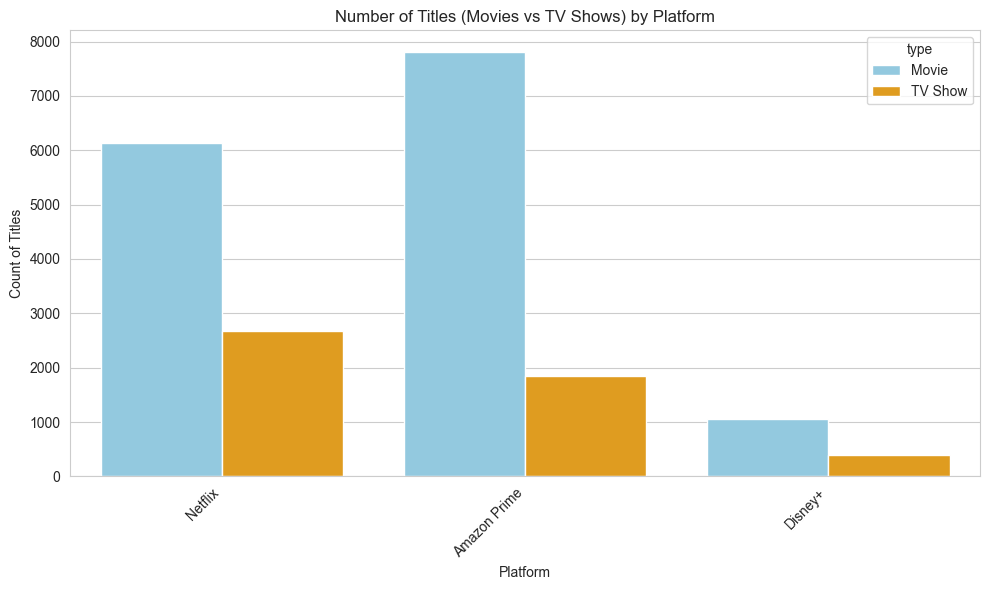

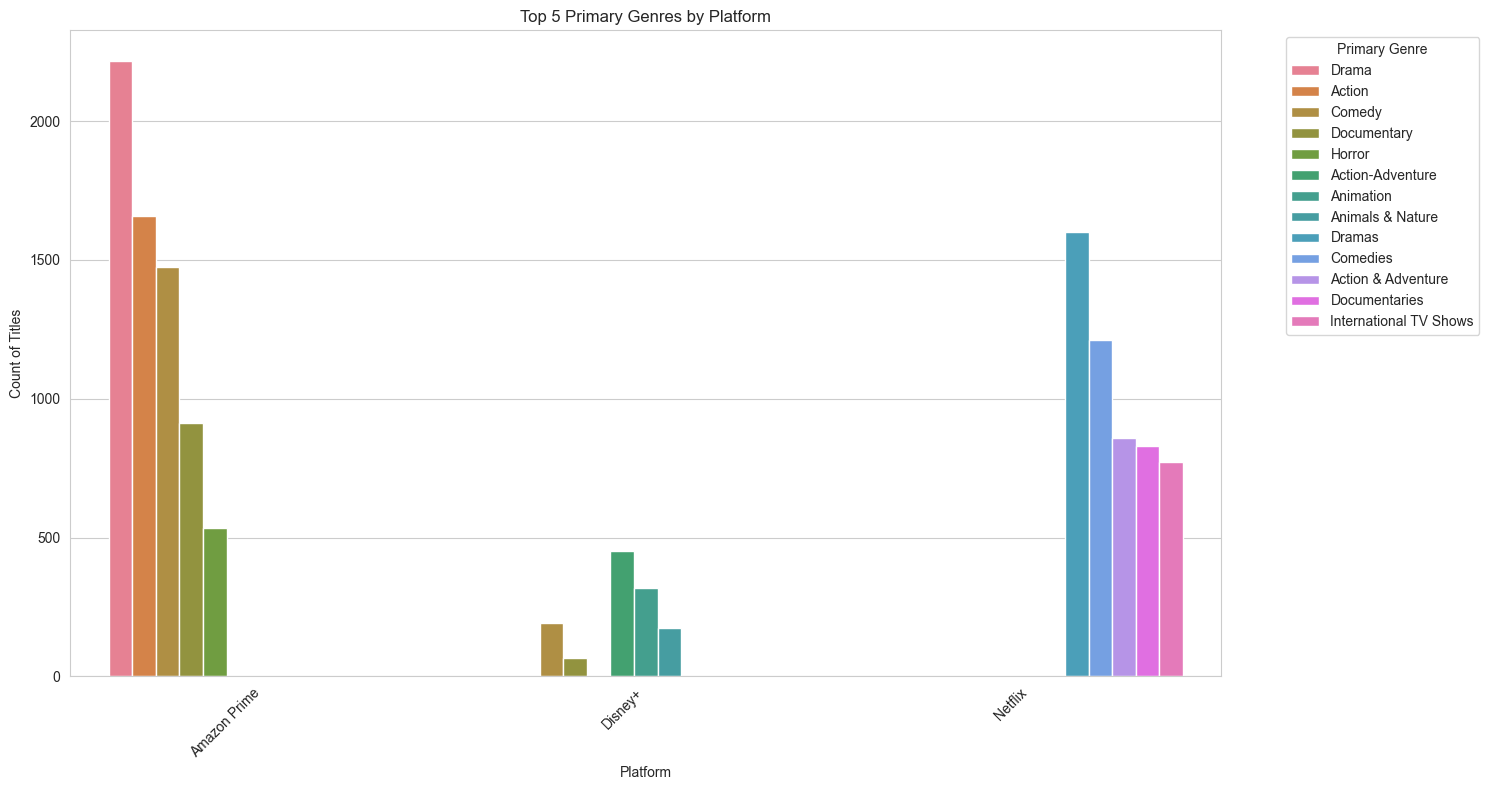

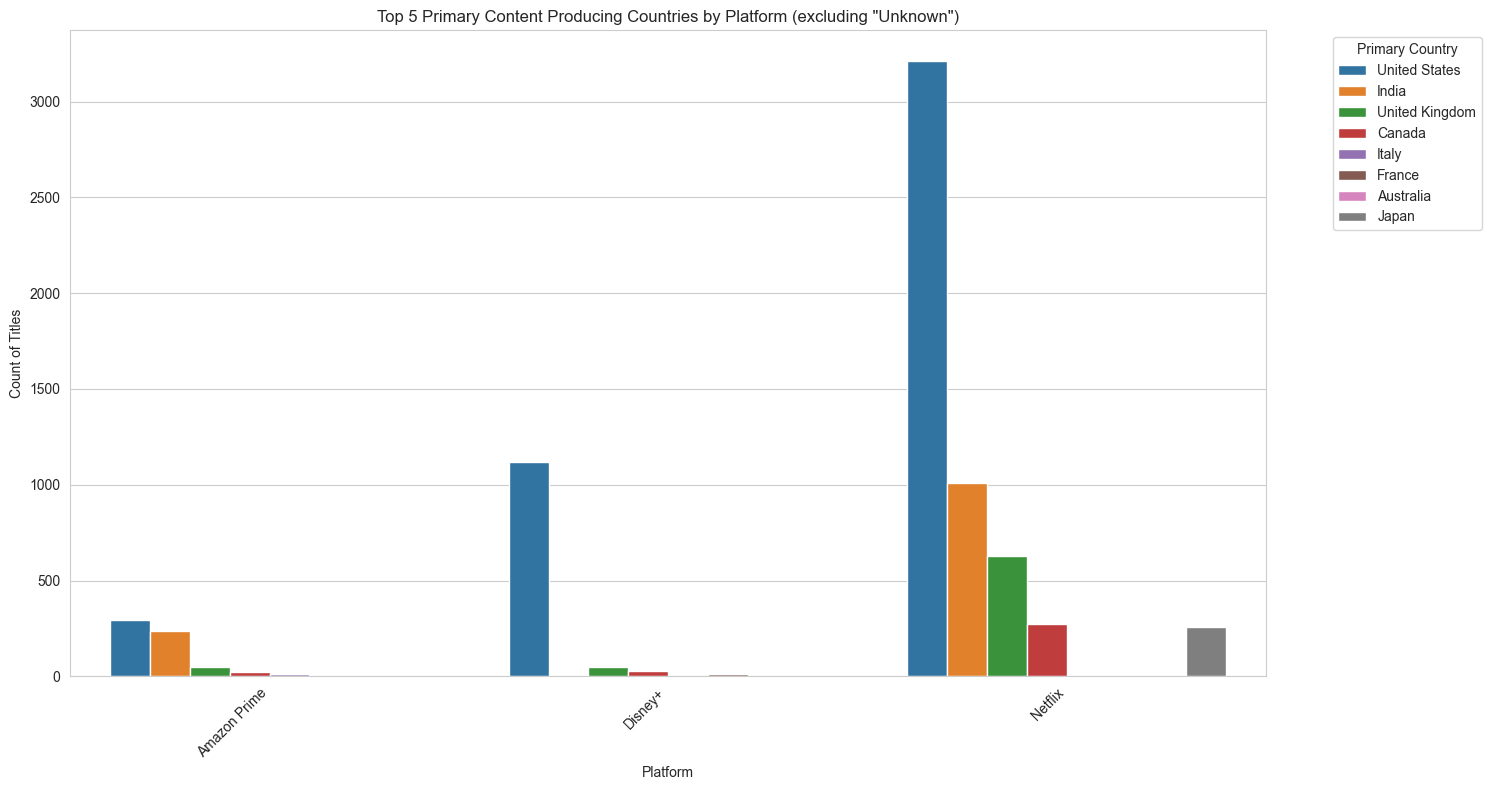

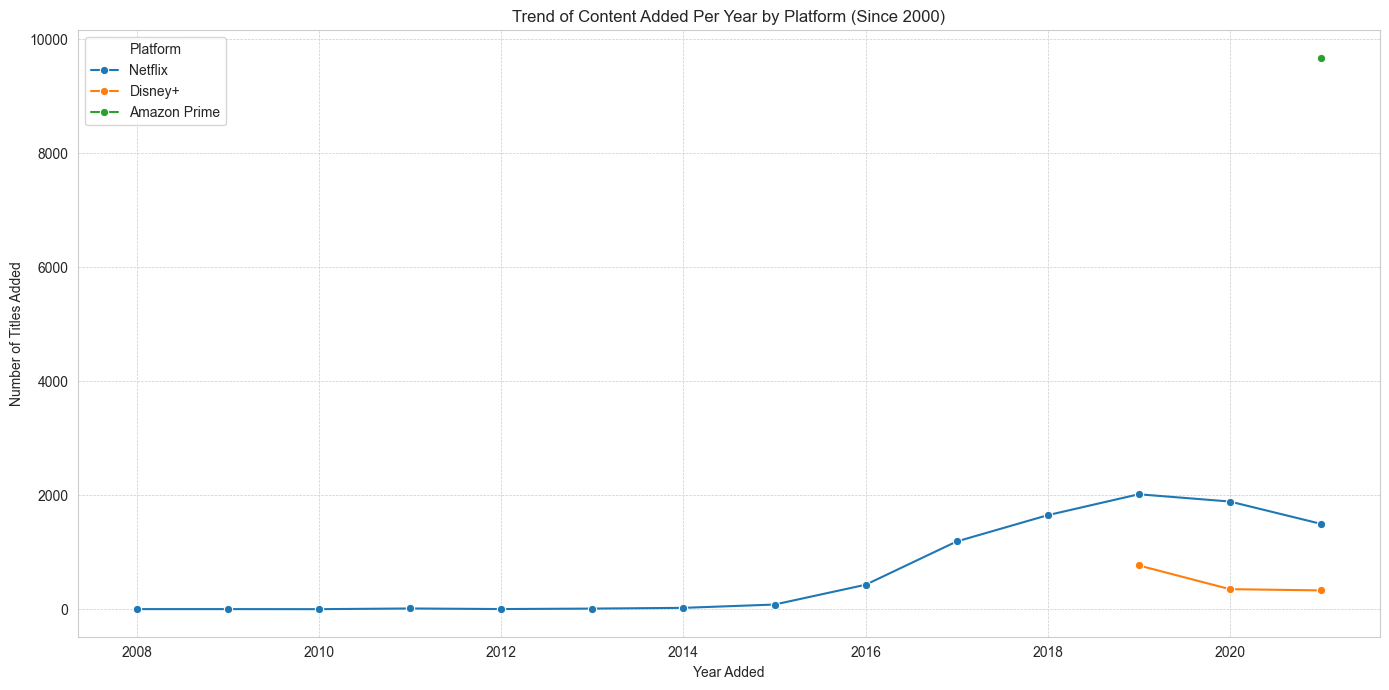

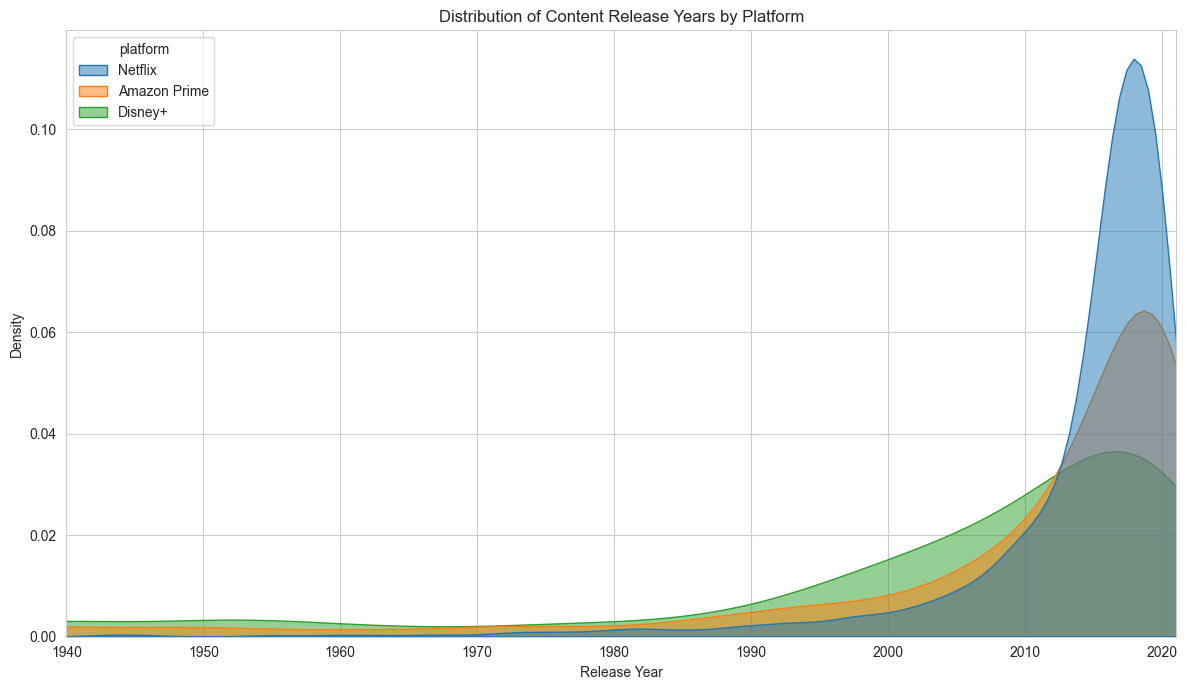

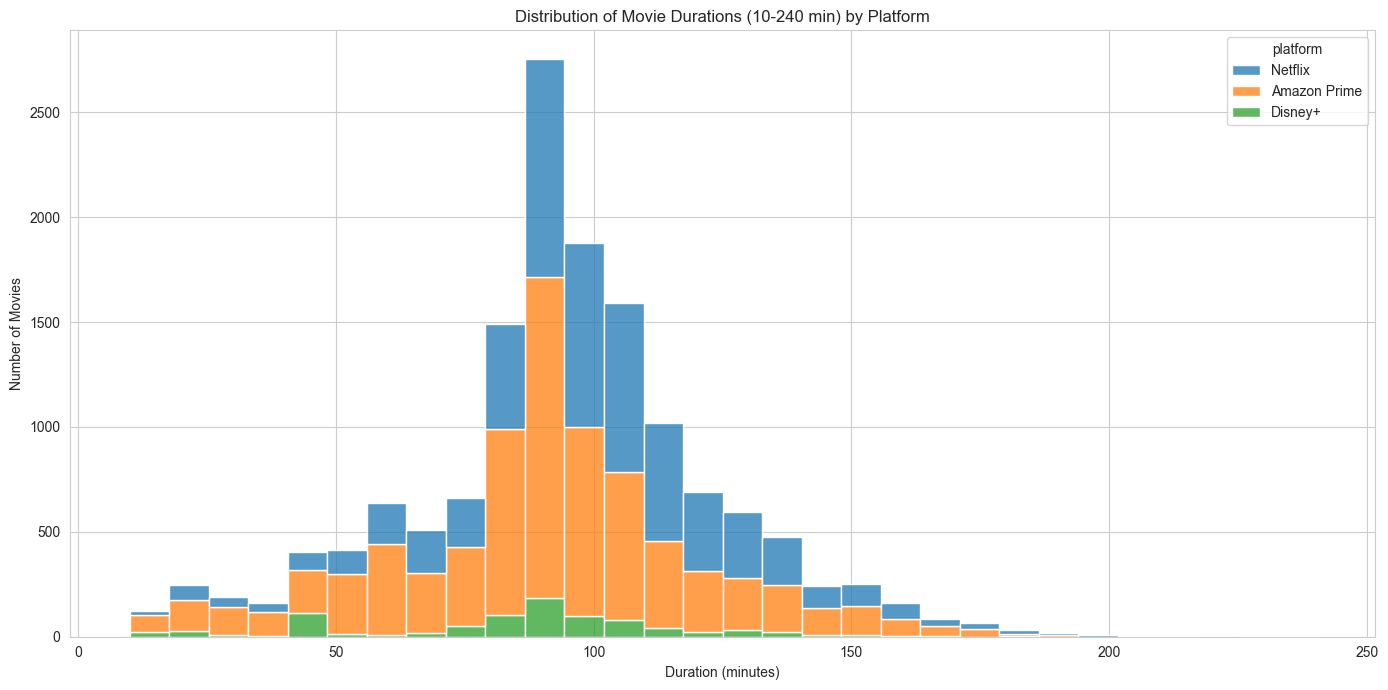

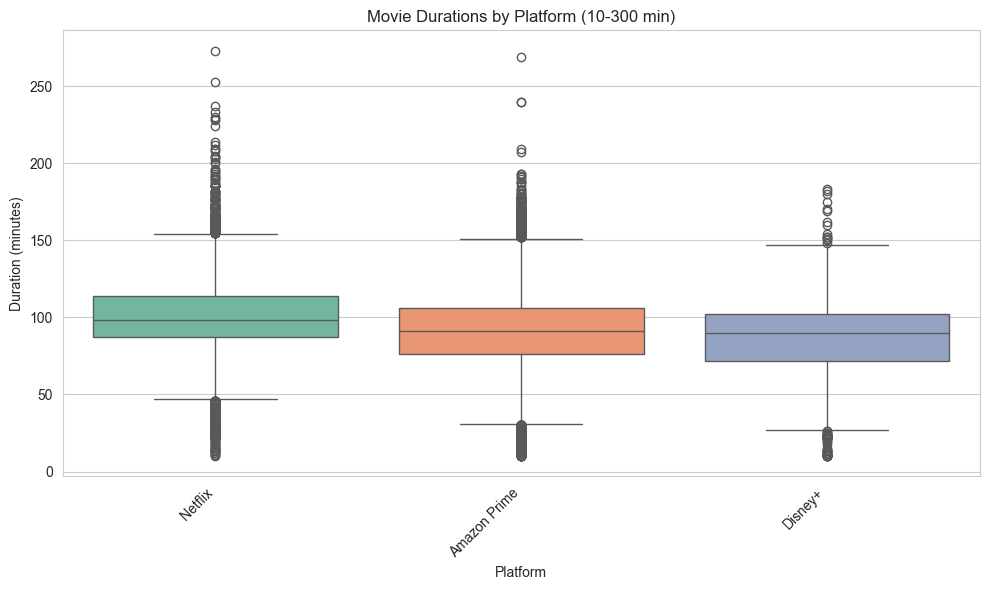

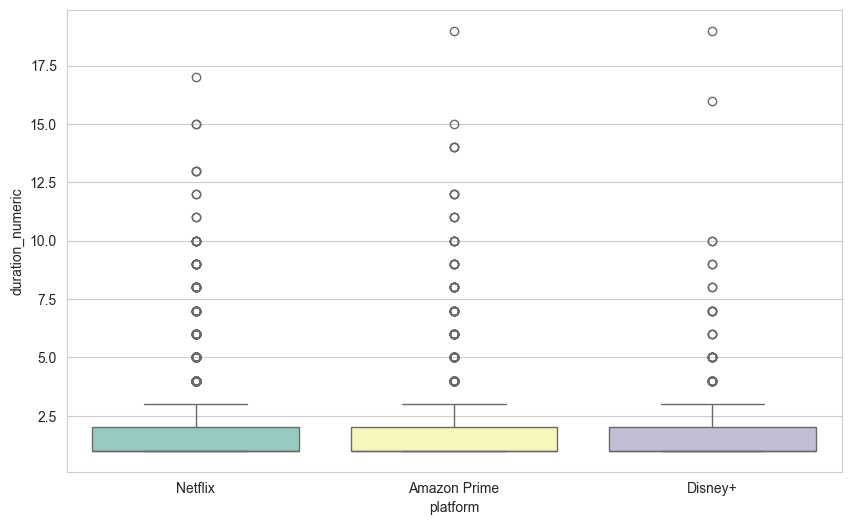

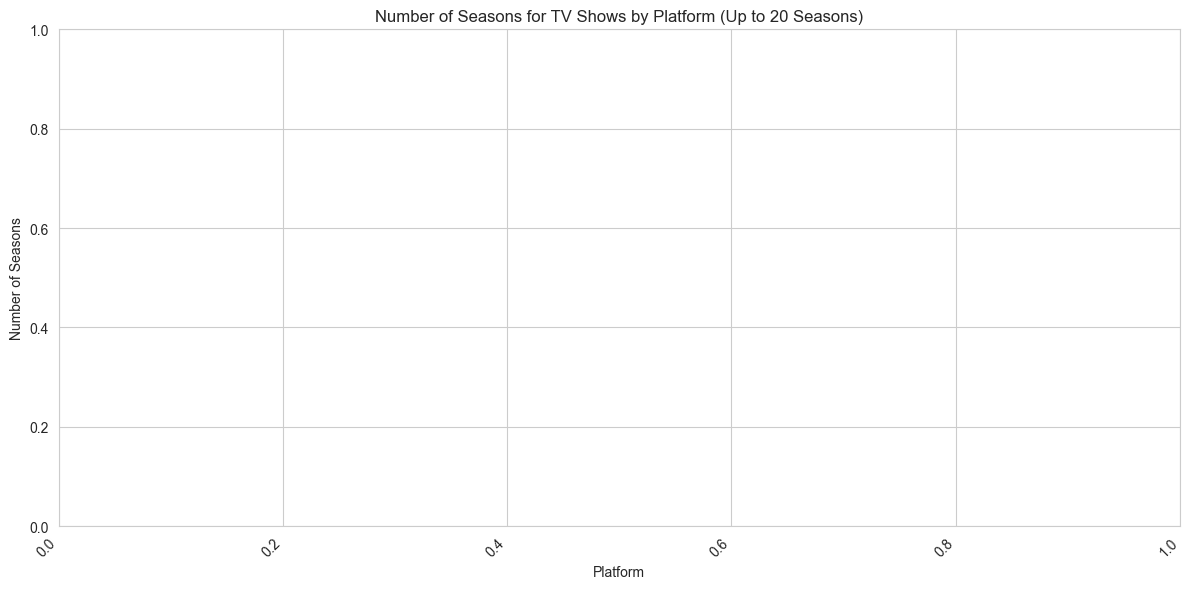

In [20]:
if not df_all.empty:
    print("\n--- Initial Visual Representation of Key Findings ---")

    # Ensure plots are displayed in the notebook if running in an environment that requires it.
    # %matplotlib inline # (Usually not needed in modern Jupyter setups)

    # a. Number of titles (Movies/TV Shows stacked) per platform
    if 'platform' in df_all.columns and 'type' in df_all.columns:
        plt.figure(figsize=(10, 6))
        sns.countplot(data=df_all, x='platform', hue='type', palette={'Movie': 'skyblue', 'TV Show': 'orange'})
        plt.title('Number of Titles (Movies vs TV Shows) by Platform')
        plt.xlabel('Platform')
        plt.ylabel('Count of Titles')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

    # b. Top N primary_genre per platform (using primary_genre)
    if 'platform' in df_all.columns and 'primary_genre' in df_all.columns:
        top_n = 5
        # Calculate top genres per platform
        top_genres_platform = df_all.groupby('platform')['primary_genre'].apply(lambda x: x.value_counts().head(top_n)).rename('count').reset_index()

        top_genres_platform = (
        df_all.groupby('platform')['primary_genre']
        .value_counts()
        .groupby('platform')
        .head(top_n)
        .reset_index(name='count')
        )

        plt.figure(figsize=(15, 8))
        sns.barplot(data=top_genres_platform, x='platform', y='count', hue='primary_genre', dodge=True)
        plt.title(f'Top {top_n} Primary Genres by Platform')
        plt.xlabel('Platform')
        plt.ylabel('Count of Titles')
        plt.xticks(rotation=45, ha='right')
        plt.legend(title='Primary Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.show()

    # c. Top N primary countries per platform
    if 'platform' in df_all.columns and 'primary_country' in df_all.columns:
        # Filter out 'Unknown' country if it dominates too much for better visualization of actual countries
        df_known_country = df_all[df_all['primary_country'] != 'Unknown']
        top_n_countries = 5
        top_countries_platform = (
        df_known_country.groupby('platform')['primary_country']
        .value_counts()
        .groupby('platform')
        .head(top_n_countries)
        .reset_index(name='count')
        )
        plt.figure(figsize=(15, 8))
        sns.barplot(
        data=top_countries_platform,
        x='platform',
        y='count',
        hue='primary_country',  # Make sure this matches the actual column name
        dodge=True
        )
        plt.title(f'Top {top_n_countries} Primary Content Producing Countries by Platform (excluding "Unknown")')
        plt.xlabel('Platform')
        plt.ylabel('Count of Titles')
        plt.xticks(rotation=45, ha='right')
        plt.legend(title='Primary Country', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.show()


    # d. Trend of content added per year_added for each platform
    if 'platform' in df_all.columns and 'year_added' in df_all.columns:
        content_added_yearly = df_all.groupby(['year_added', 'platform']).size().reset_index(name='count')
        # Filter for more recent years if the range is too wide, e.g., after 2000
        content_added_yearly = content_added_yearly[content_added_yearly['year_added'] >= 2000] 
        
        plt.figure(figsize=(14, 7))
        sns.lineplot(data=content_added_yearly, x='year_added', y='count', hue='platform', marker='o')
        plt.title('Trend of Content Added Per Year by Platform (Since 2000)')
        plt.xlabel('Year Added')
        plt.ylabel('Number of Titles Added')
        plt.legend(title='Platform')
        plt.grid(True, which='both', linestyle='--', linewidth=0.5)
        plt.tight_layout()
        plt.show()

    # e. Distribution of release_year of content for each platform (KDE Plot)
    if 'platform' in df_all.columns and 'release_year' in df_all.columns:
        plt.figure(figsize=(12, 7))
        sns.kdeplot(data=df_all, x='release_year', hue='platform', fill=True, alpha=0.5, common_norm=False)
        plt.title('Distribution of Content Release Years by Platform')
        plt.xlabel('Release Year')
        plt.ylabel('Density')
        # Limiting x-axis for better readability if very old titles skew it
        plt.xlim(df_all['release_year'].quantile(0.01) if not df_all['release_year'].empty else 1900, 
                 df_all['release_year'].max() if not df_all['release_year'].empty else 2025) 
        plt.tight_layout()
        plt.show()

    # f. Distribution of movie durations (for type == 'Movie') - Histogram
    if 'type' in df_all.columns and 'duration_numeric' in df_all.columns and 'platform' in df_all.columns:
        df_movies_viz = df_all[(df_all['type'] == 'Movie') & (df_all['duration_numeric'].notna())]
        # Filter out extreme outliers for better visualization if needed, e.g. duration between 10 and 240 mins
        df_movies_viz = df_movies_viz[(df_movies_viz['duration_numeric'] >= 10) & (df_movies_viz['duration_numeric'] <= 240)]

        plt.figure(figsize=(14, 7))
        sns.histplot(data=df_movies_viz, x='duration_numeric', hue='platform', multiple='stack', bins=30, kde=False)
        plt.title('Distribution of Movie Durations (10-240 min) by Platform')
        plt.xlabel('Duration (minutes)')
        plt.ylabel('Number of Movies')
        plt.tight_layout()
        plt.show()

    # g. Compare movie duration_numeric across platforms - Box Plot
    if 'type' in df_all.columns and 'duration_numeric' in df_all.columns and 'platform' in df_all.columns:
        df_movies_box = df_all[(df_all['type'] == 'Movie') & (df_all['duration_numeric'].notna())]
        # Filter for a reasonable range if outliers are too extreme for box plot visibility
        df_movies_box = df_movies_box[(df_movies_box['duration_numeric'] >= 10) & (df_movies_box['duration_numeric'] <= 300)] 
        
        plt.figure(figsize=(10, 6))
        sns.boxplot(
        data=df_movies_box, 
        x='platform', 
        y='duration_numeric', 
        hue='platform',  # Add this
        palette="Set2",
        legend=False  # Add this to avoid duplicate legend
        )
        plt.title('Movie Durations by Platform (10-300 min)')
        plt.xlabel('Platform')
        plt.ylabel('Duration (minutes)')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

    # h. Compare number of seasons (duration_numeric for TV shows) across platforms - Box Plot
    if 'type' in df_all.columns and 'duration_numeric' in df_all.columns and 'platform' in df_all.columns:
        df_tv_box = df_all[(df_all['type'] == 'TV Show') & (df_all['duration_numeric'].notna())]
        # Filter for a reasonable range, e.g., up to 20 seasons
        df_tv_box = df_tv_box[df_tv_box['duration_numeric'] <= 20]

        plt.figure(figsize=(10, 6))
        sns.boxplot(
        data=df_tv_box, 
        x='platform', 
        y='duration_numeric', 
        hue='platform',  # Add hue using same variable as x-axis
        palette="Set3",
        legend=False  # Hide legend since x-axis already shows platforms
        )
        plt.show()
        plt.title('Number of Seasons for TV Shows by Platform (Up to 20 Seasons)')
        plt.xlabel('Platform')
        plt.ylabel('Number of Seasons')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
else:
    print("\nSkipping Visualizations: df_all is empty.")


---

## ✅ End of Review 1 Notebook

This notebook has completed the following steps:

- ✔️ Data loading and platform tagging
- ✔️ Handling missing values
- ✔️ Feature selection and engineering
- ✔️ Ensuring data consistency and integrity
- ✔️ Generating summary statistics and insights
- ✔️ Identifying key patterns, trends, and anomalies
- ✔️ Handling outliers with IQR
- ✔️ Creating initial visual representations

The processed DataFrame `df_all` is now ready for advanced visualizations, storytelling, and deeper analysis in **Review 2**.

---

### 📌 Next Steps:

- 💾 Save the processed DataFrame `df_all`:
  - Directory: `01_Data/processed_data/`
  - Filename: `ott_combined_cleaned.csv`
  
- 📊 Begin developing insights and visual dashboards in the next notebook.

---


In [21]:
# Save the processed DataFrame
if not df_all.empty:
    processed_data_path = '../01_Data/processed_data/all_platforms_data.csv'
    try:
        df_all.to_csv(processed_data_path, index=False)
        print(f"\nProcessed data saved to: {processed_data_path}")
    except Exception as e:
        print(f"Error saving processed data: {e}")
else:
    print("\nSkipping saving of processed data: df_all is empty.")


Processed data saved to: ../01_Data/processed_data/all_platforms_data.csv
